In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import cros

In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [57]:
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'].values)
df['BP']=encoder.fit_transform(df['BP'].values)
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'])

In [58]:
X=df.drop('Drug',axis=1)
y=df['Drug'].copy()

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=20)

In [78]:
DT_model=DecisionTreeClassifier(min_samples_leaf=5)
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=5)

In [79]:
y_predicted=DT_model.predict(X_test)

In [80]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [64]:
print(confusion_matrix(y_test,y_predicted))

[[ 7  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  3 17  1]
 [ 0  0  0  0 39]]


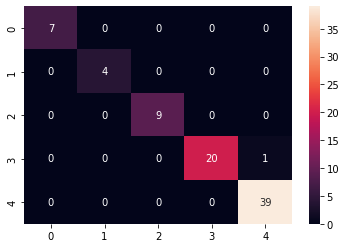

In [81]:
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True)
plt.show()

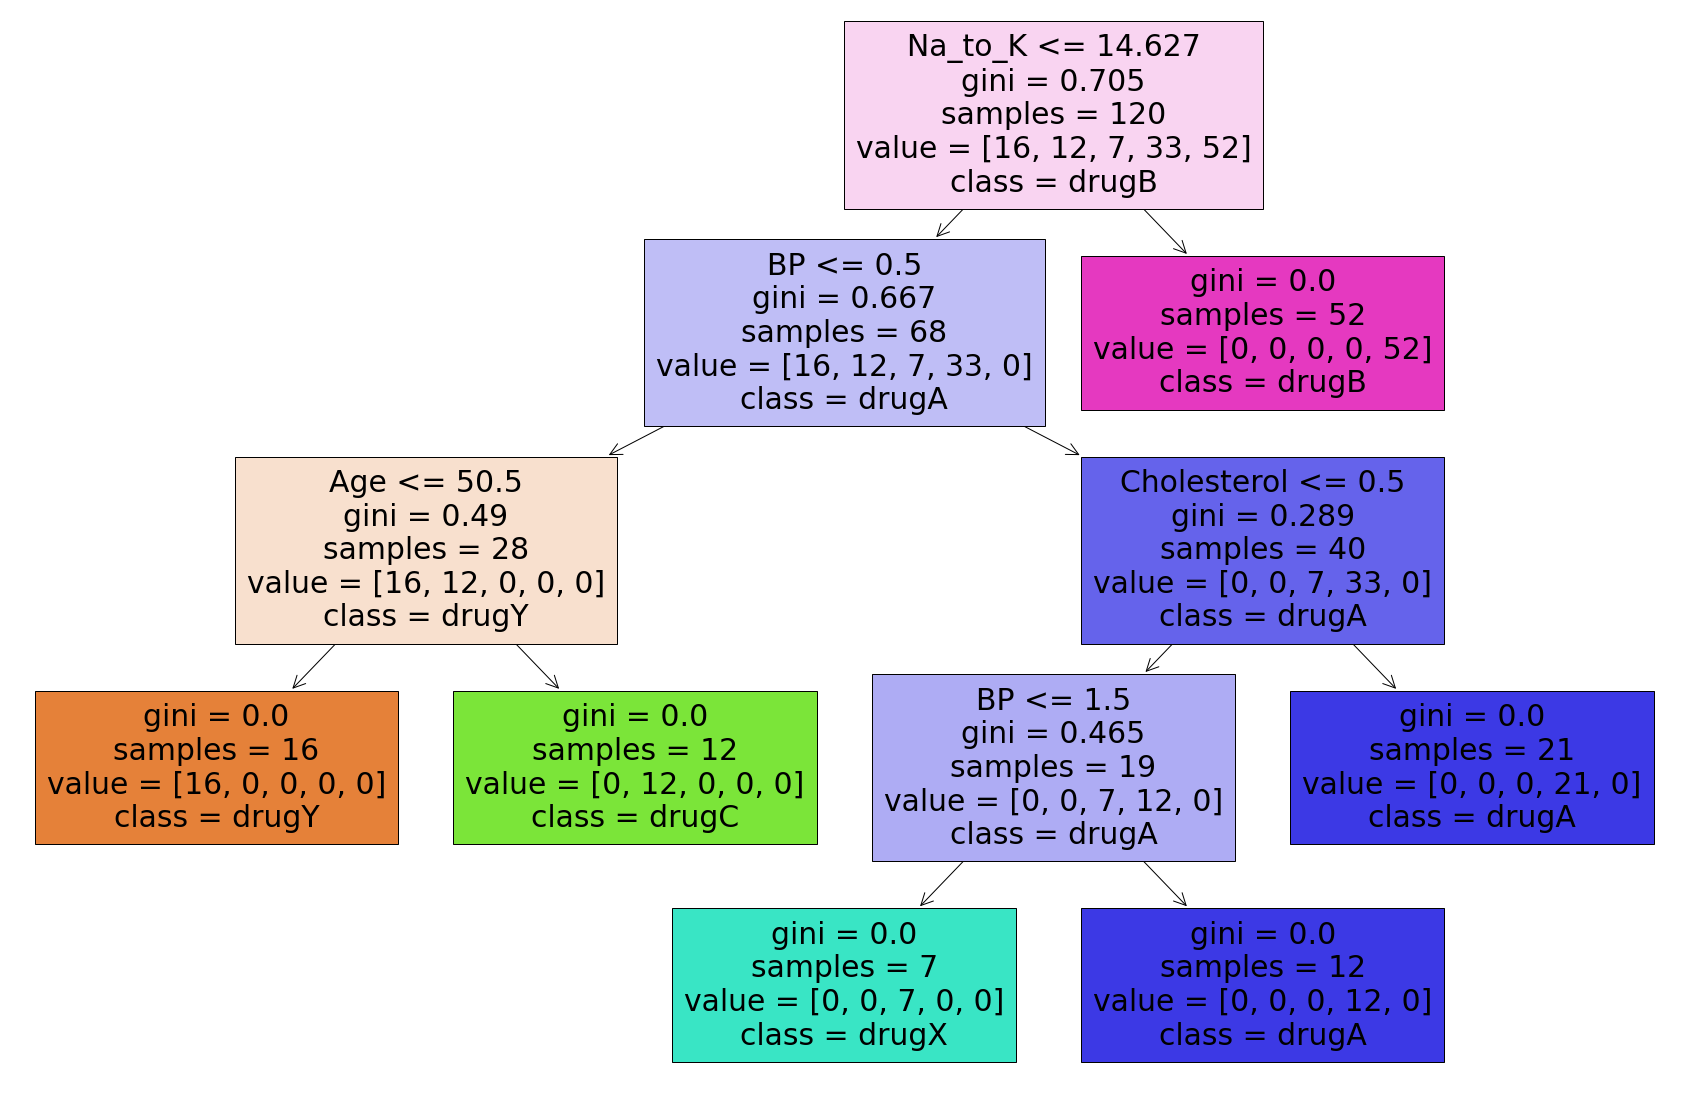

In [82]:
cols=df.drop('Drug',axis=1).columns
classes=df['Drug'].unique()
plt.figure(figsize=(30,20))
tree.plot_tree(DT_model,feature_names=cols,class_names=classes,filled=True)
plt.show()

In [83]:
random_tree=RandomForestClassifier(n_estimators=20)
random_tree.fit(X_train,y_train)
yf_predicted=random_tree.predict(X_test)

In [84]:
print(classification_report(y_test,yf_predicted))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.89      0.94         9
       drugX       0.95      0.95      0.95        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.97        80
   macro avg       0.99      0.97      0.98        80
weighted avg       0.98      0.97      0.97        80

